In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and exploratory analysis

In [2]:
#read in the data set
#consists of 1.5 million million reviews 
df = pd.read_csv("beer_reviews.csv")
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
unique_breweries = df['brewery_id'].unique()
unique_reviewers = df['review_profilename'].unique()
unique_styles = df['beer_style'].unique()
unique_beers = df['beer_beerid'].unique()

print(f"There are {len(unique_breweries)} unique breweries.")
print(f"{len(unique_reviewers)} unique reviewers.")
print(f"{len(unique_styles)} unique beers styles.")
print(f"{len(unique_beers)} unique beers.\n")
print(df.shape)

There are 5840 unique breweries.
33388 unique reviewers.
104 unique beers styles.
66055 unique beers.

(1586614, 13)


In [4]:
#Change review_time to datetime
df['review_time'] = pd.to_datetime( df['review_time'], unit='s')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


C:\Users\gerri\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


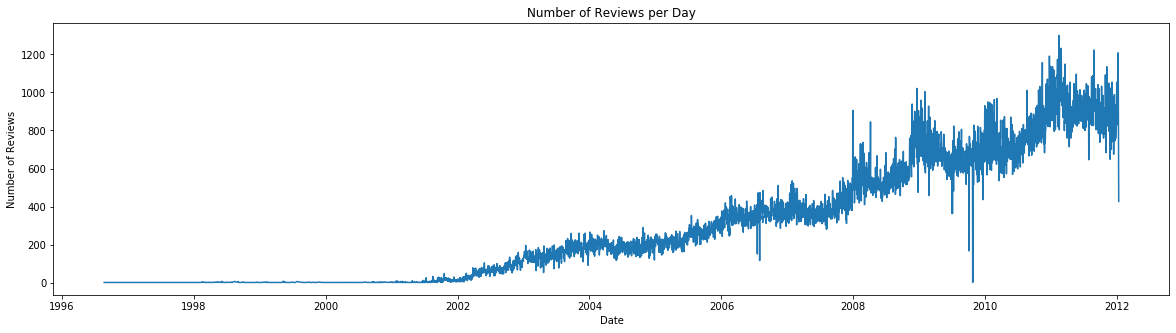

In [5]:
group_by_date = df[['review_time']].groupby( df['review_time'].dt.date ).agg(['count'])

plt.figure(figsize=(20,5))
plt.plot(group_by_date)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Day')
plt.show()

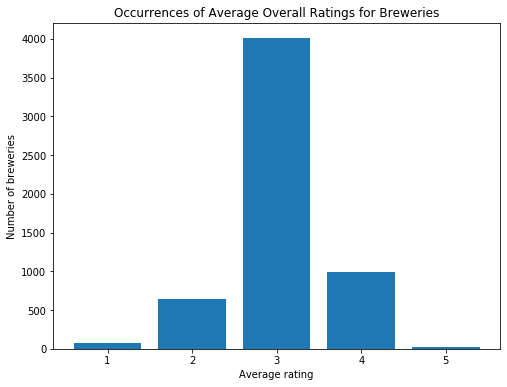

,brewery_name,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,'t Hofbrouwerijke,13160.0,3.702703,3.783784,3.851351,3.540541,3.621622,6.789189,35306.864865
1,(512) Brewing Company,17863.0,4.065789,4.001645,4.057566,3.958882,4.055921,7.149662,51099.884868
2,10 Barrel Brewing Co.,16873.0,3.732143,3.571429,3.815476,3.619048,3.636905,6.066667,55452.488095
3,1516 Brewing Company,4473.0,4.132353,3.911765,4.191176,3.897059,4.073529,6.266667,38128.000000
4,16 Mile Brewing Company,20688.0,3.570652,3.402174,3.766304,3.614130,3.472826,6.033696,55400.184783


In [43]:
breweries = df.groupby(['brewery_name'])
breweries = breweries.mean()
breweries = breweries.reset_index()
fig, ax = plt.subplots(figsize=(8,6))
x = range(1,6)
counts = np.zeros(5)
for val in breweries['review_overall']:
    if val < 2:
        counts[0] += 1
    elif val < 3:
        counts[1] += 1
    elif val < 4:
        counts[2] += 1
    elif val < 5:
        counts[3] += 1
    else:
        counts[4] += 1


ax.bar(x, counts)
ax.set_xlabel('Average rating')
ax.set_ylabel('Number of breweries')
ax.set_title('Occurrences of Average Overall Ratings for Breweries')
plt.show()
breweries.head()

In [44]:
print('Average overall review: ', np.round(np.mean(df['review_overall']),4))
print('Total number of breweries for each rating: ', counts)


Average overall review:  3.8156
Total number of breweries for each rating:  [  78.  641. 4009.  993.   21.]


In [49]:
breweries_sorted = breweries.sort_values('review_overall')
#print(breweries_sorted.head(),'\n')
lowest_rated_style = [list(breweries_sorted['brewery_name'])[0], list(breweries_sorted['review_overall'])[0]]
highest_rated_style = [list(breweries_sorted['brewery_name'])[-1], list(breweries_sorted['review_overall'])[-1]]
print(f"Highest rated brewery: {highest_rated_style[0]} ({highest_rated_style[1]})")
print(f"Lowest rated brewery: {lowest_rated_style[0]} ({lowest_rated_style[1]})")

Highest rated brewery: Elizabeth Street Brewery (5.0)
Lowest rated brewery: Red Dot Brewhouse (1.0)
